# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [168]:
import pandas as pd

In [169]:
df = pd.read_csv("craftcans.csv")

## Read in the file `craftcans.csv`, and look at the first first rows

In [170]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [171]:
df.shape

(2416, 7)

In [172]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [173]:
beer_sum = df.groupby('Brewery').Beer.count()
top_10 = beer_sum.sort_values(ascending=False).head(10)

top_10

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [174]:
top_ABV = df['ABV'].value_counts().head(10)

top_ABV.head(1)

ABV
5.00%    215
Name: count, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [175]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [176]:
df['ABV'] = df['ABV'].str.replace("%", "")

df['ABV']

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [177]:
df['ABV'] = df['ABV'].astype(float)

In [178]:
df['ABV'].dtypes

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [179]:
df['ABV'].mode()

0    5.0
Name: ABV, dtype: float64

<Axes: ylabel='count'>

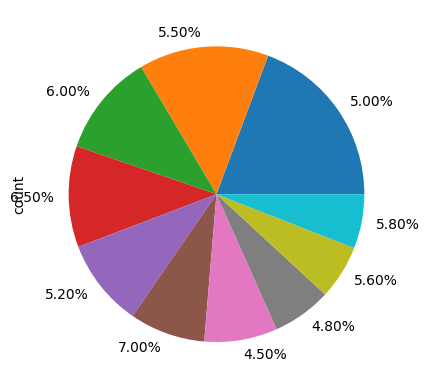

In [180]:
top_ABV.plot(kind='pie', y='ABV')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [181]:
df['ABV'].notnull().value_counts()

ABV
True     2348
False      68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [182]:
top_cities = df.groupby('Location')['Beer'].count().sort_values(ascending=False)

top_cities.head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [183]:
brooklyn = df[df['Location']=="Brooklyn, NY"]

brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [184]:
brooklyn.groupby('Beer')['Brewery'].count().sort_values(ascending=False).head(1)

Beer
East India Pale Ale    2
Name: Brewery, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [185]:
sixpoint = brooklyn[brooklyn['Brewery']=="Sixpoint Craft Ales"]

sixpoint

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.0,70
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.7,74
1267,The Crisp,Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.4,42


In [186]:
sixpoint['Style'].value_counts().head(7)

# There are no five common styles but rather the most common six styles

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Rye Beer                          2
Fruit / Vegetable Beer            1
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [187]:
NY = df[df['Location'].str.contains("NY", na=False)]

NY

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [188]:
NY['Brewery'].value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Upstate Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
Montauk Brewing Company           2
Southampton Publick House         1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

In [189]:
NY['Brewery'].value_counts().sum()

np.int64(74)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [190]:
IPA = df[df['Style'].str.contains('IPA', na=False)]

IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [206]:
# Convert 'IBUs' to numeric, replacing non-numeric values with NaN

df['IBUs_num'] = pd.to_numeric(df['IBUs'], errors='coerce')

In [207]:
df = df.dropna(subset=['IBUs_num'])

In [210]:
df['IBUs_num'] = df['IBUs_num'].astype(int) 

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      1405 non-null   object 
 1   Brewery   1405 non-null   object 
 2   Location  1405 non-null   object 
 3   Style     1403 non-null   object 
 4   Size      1405 non-null   object 
 5   ABV       1405 non-null   float64
 6   IBUs      1405 non-null   object 
 7   IBUs_num  1405 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 98.8+ KB


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [212]:
df['IBUs_num'].mean().round(2)

np.float64(42.71)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [198]:
import matplotlib.pyplot as plt

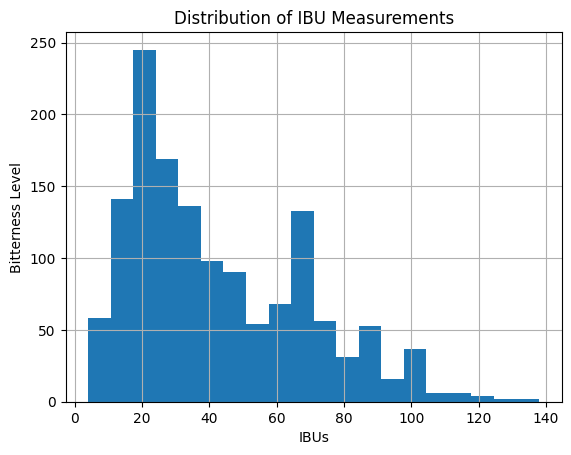

In [199]:
IBU_no_na.hist(bins=20)
plt.xlabel('IBUs')
plt.ylabel('Bitterness Level')
plt.title('Distribution of IBU Measurements')
plt.show()

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [213]:
IBU_75 = df['IBUs_num'].quantile(0.75)

IBU_75

np.float64(64.0)

In [214]:
df[df['IBUs_num'] > IBU_75].sort_values('IBUs_num', ascending=False)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,IBUs_num
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.2,138,138
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.9,135,135
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.0,130,130
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.9,126,126
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120,120
...,...,...,...,...,...,...,...,...
2349,Modus Hoperandi,Ska Brewing Company,"Durango, CO",American IPA,12 oz.,6.8,65,65
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65,65
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65,65
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65,65


In [216]:
df.shape

(1405, 8)

## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!